In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()

In [2]:
raw_data=pd.read_csv('salarydata.csv')

In [3]:
raw_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
raw_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
y=raw_data['Salary']
x1=raw_data['YearsExperience']

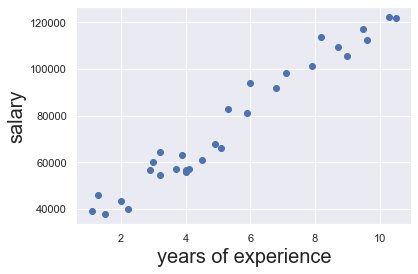

In [6]:
plt.scatter(x1,y)
plt.xlabel('years of experience', fontsize=20)
plt.ylabel('salary' ,fontsize=20)
plt.show()

In [7]:
x=sm.add_constant(x1)
result=sm.OLS(y,x).fit()
result.summary()
#our model needs an intercept so that we can add a column of 1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 17 Jul 2020   Prob (F-statistic):           1.14e-20
Time:                        13:41:36   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

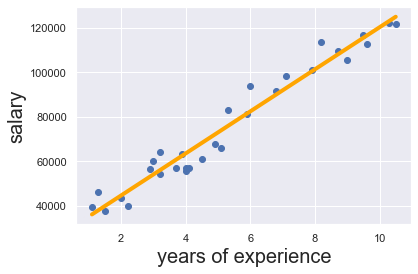

In [8]:
plt.scatter(x1,y)
yhat=2.579e+04+9449.9623*x1
fig=plt.plot(x1,yhat,lw=4,c='orange',label='regression line')
plt.xlabel('years of experience', fontsize=20)
plt.ylabel('salary' ,fontsize=20)
plt.show()


In [9]:
a=raw_data['YearsExperience']
a.head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [10]:
a.shape

(30,)

In [11]:
a_matrix=a.values.reshape(30,1)
a_matrix.shape

(30, 1)

In [12]:
b=raw_data['Salary']
b.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [13]:
b.shape

(30,)

In [14]:
b_matrix=b.values.reshape(30,1)
b_matrix.shape

(30, 1)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
a_matrix_train,a_matrix_test,b_matrix_train,b_matrix_test=train_test_split(a_matrix,b_matrix,test_size=.2, random_state=100)

In [17]:
#to train our algorithm after splitting the data
reg=LinearRegression()
reg.fit(a_matrix_train,b_matrix_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
predictions=reg.predict(a_matrix_test)

In [19]:
predictions.shape

(6, 1)

In [20]:
b_matrix_test.shape

(6, 1)

In [21]:
a_matrix_test

array([[ 3.7],
       [ 9.5],
       [10.3],
       [ 4.1],
       [ 2.9],
       [ 4. ]])

In [22]:
b_matrix_test

array([[ 57189.],
       [116969.],
       [122391.],
       [ 57081.],
       [ 56642.],
       [ 56957.]])

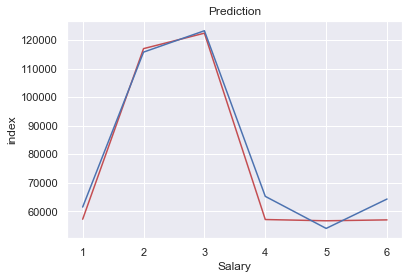

In [23]:

c = [i for i in range (1,len(b_matrix_test)+1,1)]
plt.plot(c,b_matrix_test,color='r',linestyle='-')
plt.plot(c,predictions,color='b',linestyle='-')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction')
plt.show()